In [23]:
!ls

class_dict.csv	sal10.png  sal2.png  sal4.png  sal6.png  sal8.png  sal.json
data.json	sal1.png   sal3.png  sal5.png  sal7.png  sal9.png


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!ls

class_dict.csv	sal10.png  sal2.png  sal4.png  sal6.png  sal8.png  sal.json
data.json	sal1.png   sal3.png  sal5.png  sal7.png  sal9.png


In [0]:
cd drive/My Drive/M.Tech Project/VGG Semantic/sal

In [0]:
import keras
import tensorflow as tf
import vis ## keras-vis
import matplotlib.pyplot as plt
import numpy as np
print("keras      {}".format(keras.__version__))
print("tensorflow {}".format(tf.__version__))

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights='imagenet')
model.summary()

In [0]:
import json
CLASS_INDEX = json.load(open("sal.json"))
classlabel = []
for i_dict in range(len(CLASS_INDEX)):
    classlabel.append(CLASS_INDEX[str(i_dict)][1])
print("No. of class={}".format(len(classlabel)))

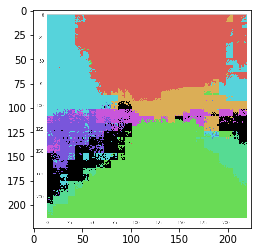

In [27]:
from keras.preprocessing.image import load_img, img_to_array
_img = load_img("sal4.png",target_size=(224,224))
plt.imshow(_img)
plt.show()

In [28]:
img               = img_to_array(_img)
img               = preprocess_input(img)
y_pred            = model.predict(img[np.newaxis,...])
class_idxs_sorted = np.argsort(y_pred.flatten())[::-1]
topNclass         = 5

for i, idx in enumerate(class_idxs_sorted[:topNclass]):
    
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,y_pred[0,idx]))
    

Top 1 predicted class:     Pr(Class=vehicle            [index=611])=11.246
Top 2 predicted class:     Pr(Class=building           [index=549])=9.356
Top 3 predicted class:     Pr(Class=building           [index=916])=9.059
Top 4 predicted class:     Pr(Class=tree               [index=664])=8.964
Top 5 predicted class:     Pr(Class=void               [index=446])=7.419


In [29]:
from vis.utils import utils

layer_idx = utils.find_layer_idx(model, 'predictions')

model.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model)


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model, "block5_conv3") 
class_idx  = class_idxs_sorted[0]
seed_input = img
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)


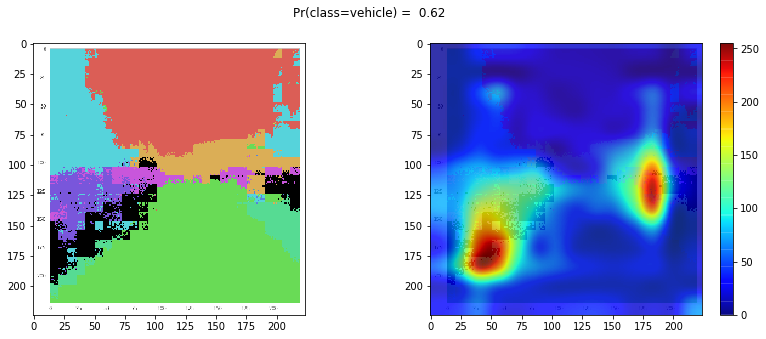

In [0]:
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(_img)
    axes[1].imshow(_img)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    plt.suptitle("Pr(class={}) = {:5.2f}".format(
                      classlabel[class_idx],
                      y_pred[0,class_idx]))
plot_map(grad_top1)


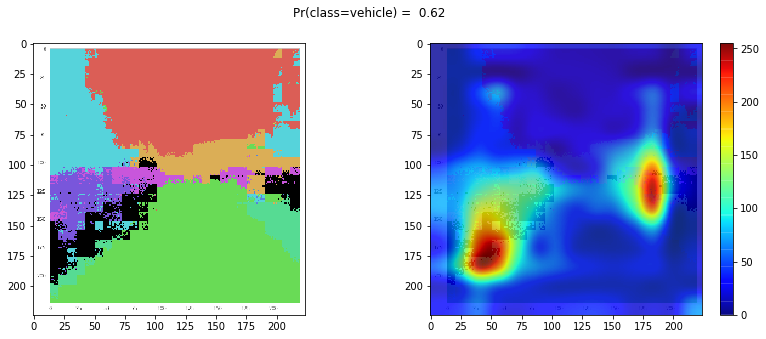

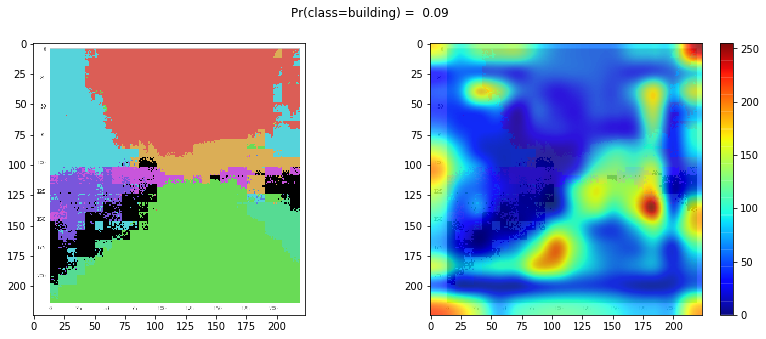

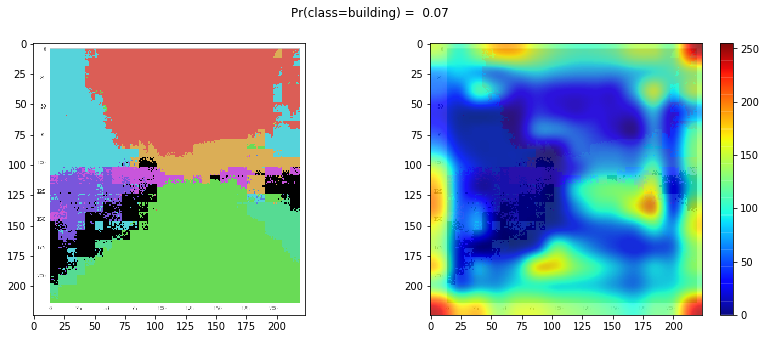

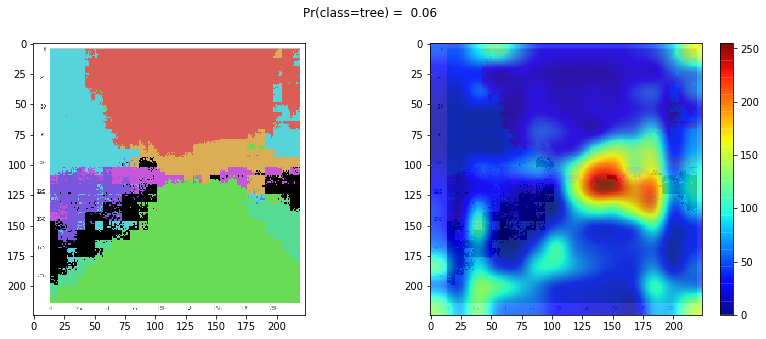

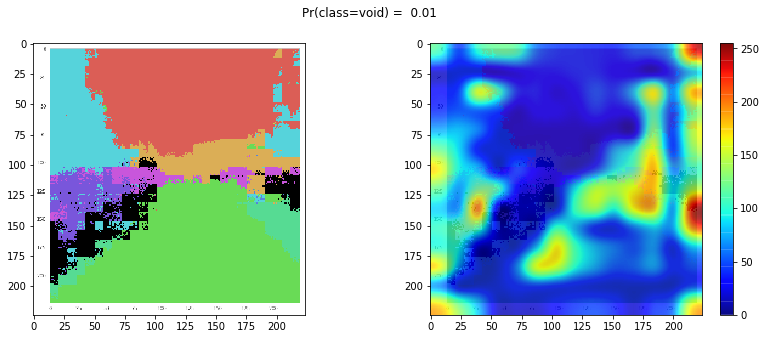

In [0]:
for class_idx in class_idxs_sorted[:topNclass]:
    grads  = visualize_cam(model,layer_idx,class_idx, seed_input,
                           penultimate_layer_idx = penultimate_layer_idx,
                           backprop_modifier     = None,
                           grad_modifier         = None)
    plot_map(grads)